# TASKS:

1.) Find distribution of observations by brand

2.) Find distribution of observations by year

3.) Find distribution of observations by state

4.) Find distribution of observations by color

5.) Find distribution of price by brand

6.) Find distribution of price by year

7.) Find distribution of price by state

8.) Find distribution of price by color

TODO: CLEAN UP THE VISUALS SO THAT THE LABELS AREN'T OVERLAPPING

---

IMPORTING LIBRARIES

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')


CHECKING OUT THE INITIAL DATA

In [58]:
# --------------------
# CREATING INITIAL DF
# --------------------
df1 = pd.read_csv('./input/USA_cars_datasets.csv')
df1.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
df1.isnull().sum()
df1.head()


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [59]:
# ----------
# COLUMNS
# ----------
df1.columns


Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [60]:
# ------------
# DATA TYPES
# ------------
df1.dtypes


price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [61]:
# ------------------
# DATA DESCRIPTION
# ------------------
df1.describe()


,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


DATA WRANGLING

In [62]:
# -------------------------------------------
# CREATING AN AVERAGE PRICE COLUMN BY BRAND
# -------------------------------------------
df1['average_price'] = df1.groupby('brand')['price'].transform('mean')
df1['average_price']


0        6300.000000
1       21666.888259
2       17781.988426
3       21666.888259
4       18669.952862
            ...     
2494    12065.820513
2495    12065.820513
2496    12065.820513
2497    12065.820513
2498    12065.820513
Name: average_price, Length: 2499, dtype: float64

In [63]:
# -----------------------------------------------
# FINDING OUTLIERS THAT HAVE A PRICE BELOW 100,
# 0 IN MANY CASES. THESE OBSERVATIONS ARE
# SKEWING THE DATA
# -----------------------------------------------
df2 = df1[df1['price'] <= 100]
df2


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price
141,0,dodge,van,2008,salvage insurance,177948.0,orange,2d8hn44h88r669549,167756157,utah,usa,2 days left,17781.988426
144,0,dodge,door,2014,salvage insurance,123660.0,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left,17781.988426
196,0,ford,mpv,2017,clean vehicle,76858.0,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left,21666.888259
206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,usa,3 days left,18669.952862
209,25,chrysler,door,2005,salvage insurance,151815.0,silver,2c3ja43r35h179032,167757193,massachusetts,usa,3 days left,13686.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0,ford,door,2008,salvage insurance,145483.0,red,1fmcu03128kc80487,167357813,oklahoma,usa,17 hours left,21666.888259
530,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left,18669.952862
534,75,ford,door,2007,salvage insurance,154989.0,blue,3fahp06z07r118828,167357820,oklahoma,usa,17 hours left,21666.888259
541,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left,18669.952862


In [64]:
# ----------------------------------------------------------------
# REPLACING THE df2 PRICES WITH THE AVERAGE PRICE FOR THAT BRAND
# ----------------------------------------------------------------
df2['price'] = df2['average_price']
df2


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price
141,17781.988426,dodge,van,2008,salvage insurance,177948.0,orange,2d8hn44h88r669549,167756157,utah,usa,2 days left,17781.988426
144,17781.988426,dodge,door,2014,salvage insurance,123660.0,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left,17781.988426
196,21666.888259,ford,mpv,2017,clean vehicle,76858.0,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left,21666.888259
206,18669.952862,chevrolet,vehicl,2020,salvage insurance,7232.0,black,2gnaxkev6l6128374,167756877,kentucky,usa,3 days left,18669.952862
209,13686.111111,chrysler,door,2005,salvage insurance,151815.0,silver,2c3ja43r35h179032,167757193,massachusetts,usa,3 days left,13686.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,21666.888259,ford,door,2008,salvage insurance,145483.0,red,1fmcu03128kc80487,167357813,oklahoma,usa,17 hours left,21666.888259
530,18669.952862,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left,18669.952862
534,21666.888259,ford,door,2007,salvage insurance,154989.0,blue,3fahp06z07r118828,167357820,oklahoma,usa,17 hours left,21666.888259
541,18669.952862,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left,18669.952862


In [65]:
# ---------------------------------------------------------
# DROPPING THE ROWS FROM df1 WHERE PRICE IS LESS THAN 100
# ---------------------------------------------------------
drop_index = df1[df1['price'] <= 100].index
df1.drop(drop_index, inplace=True)


In [66]:
# ------------------------------------------------------
# CREATING A THIRD DF. df3 = df1 + df2
# ------------------------------------------------------
df3 = pd.concat([df1, df2], ignore_index=True)
df3


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price
0,6300.000000,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,6300.000000
1,2899.000000,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,21666.888259
2,5350.000000,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,17781.988426
3,25000.000000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,21666.888259
4,27700.000000,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,18669.952862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,21666.888259,ford,door,2008,salvage insurance,145483.0,red,1fmcu03128kc80487,167357813,oklahoma,usa,17 hours left,21666.888259
2495,18669.952862,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left,18669.952862
2496,21666.888259,ford,door,2007,salvage insurance,154989.0,blue,3fahp06z07r118828,167357820,oklahoma,usa,17 hours left,21666.888259
2497,18669.952862,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left,18669.952862


1.) FIND DISTRIBUTION OF OBSERVATIONS BY BRAND

In [67]:
# -------------------------------------------------------------
# CHECKING THE VALUE COUNTS BY BRAND
# -------------------------------------------------------------
df3['brand'].value_counts()


ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
honda                12
infiniti             12
cadillac             10
mercedes-benz        10
heartland             5
audi                  4
peterbilt             4
land                  4
acura                 3
lexus                 2
lincoln               2
mazda                 2
ram                   1
jaguar                1
harley-davidson       1
toyota                1
maserati              1
Name: brand, dtype: int64

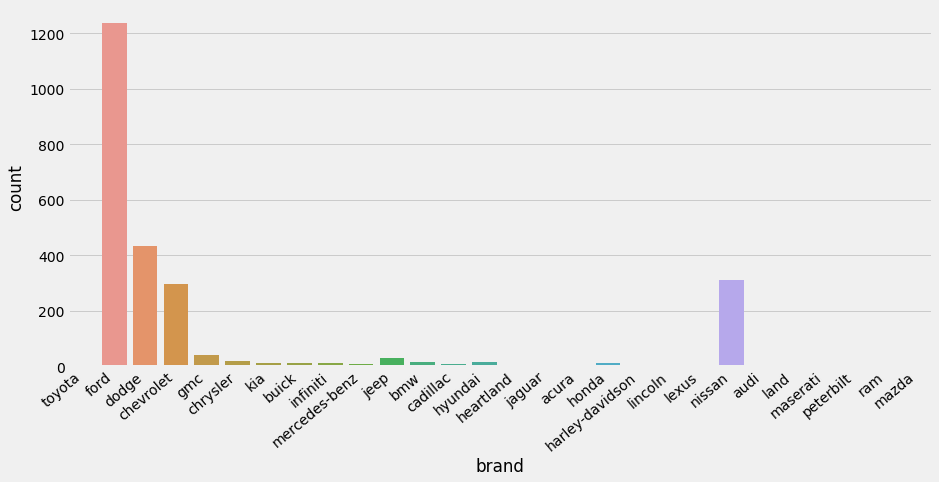

In [110]:
# --------------------------------------------------
# PLOTTING THE BREAKDOWN OF THE CARS SOLD BY BRAND
# --------------------------------------------------
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='brand', data=df3, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


2.) FIND DISTRIBUTION OF OBSERVATIONS BY YEAR

In [69]:
# ------------------------------
# COUNT OF DATA POINTS BY YEAR
# ------------------------------
# df3.groupby('year')['year'].counts()
df3['year'].value_counts()


2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2005      6
2007      6
2001      5
2000      4
1998      4
1997      2
2002      2
1996      2
1994      2
1999      1
1973      1
1993      1
1995      1
1984      1
Name: year, dtype: int64

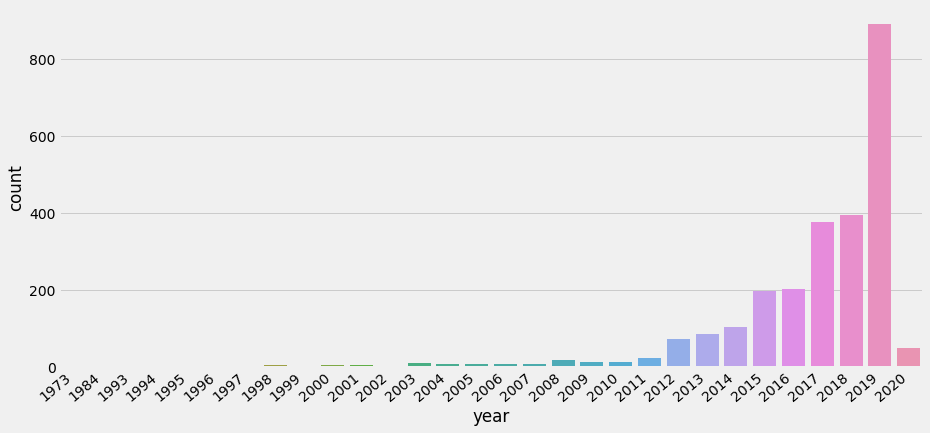

In [111]:
# --------------------------------------------------
# PLOTTING THE BREAKDOWN OF THE CARS SOLD BY YEAR
# --------------------------------------------------
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='year', data=df3, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [100]:
# ---------------------------------------------
# CREATING A NEW DF THAT ONLY CONTAINS DATA
# FROM THE LAST 6 YEARS
# ---------------------------------------------
df4 = df3[np.logical_or.reduce([
    df3['year']==2015,
    df3['year']==2016,
    df3['year']==2017,
    df3['year']==2018,
    df3['year']==2019,
    df3['year']==2020]
)]
df4.head()


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,17781.988426
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,18669.952862
5,5700.0,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,17781.988426
7,13350.0,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,10657.380952
8,14600.0,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,18669.952862


In [72]:
# ------------------------------------------
# LOOKING AT THE BREAKDOWN OF THE CAR DATA
# IN THE NEW DF BY YEAR
# ------------------------------------------
# df4.groupby('year')['year'].count()
df4['year'].value_counts()


2019    892
2018    395
2017    377
2016    203
2015    196
2020     48
Name: year, dtype: int64

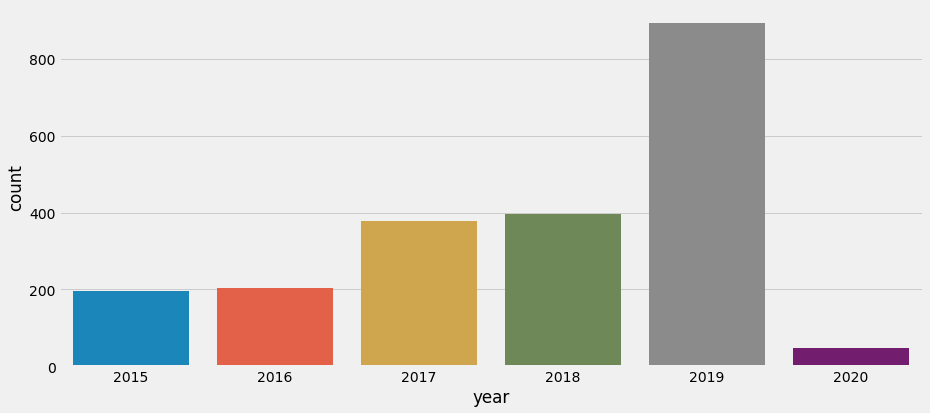

In [73]:
# ------------------------------------------------------
# PLOTTING THE BREAKDOWN OF THE MORE PREVALENT YEARS
# ------------------------------------------------------
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='year', data=df4, ax=ax)


3.) FIND DISTRIBUTION OF OBSERVATIONS BY STATE

In [74]:
# ---------------------------------------------------
# LOOKING AT THE BREAKDOWN OF THE CAR DATA BY STATE
# ---------------------------------------------------
# df4.groupby('state')['state'].count()
df4['state'].value_counts()


pennsylvania      266
florida           200
california        172
texas             161
michigan          157
north carolina    142
minnesota         109
illinois           95
nevada             80
virginia           79
wisconsin          79
new jersey         72
oklahoma           58
south carolina     54
new york           47
georgia            39
missouri           35
arizona            29
ohio               29
massachusetts      23
connecticut        22
oregon             21
tennessee          17
mississippi        17
west virginia      15
alabama            15
washington         11
colorado           11
indiana            10
louisiana           9
kentucky            7
ontario             7
nebraska            4
arkansas            4
new hampshire       4
new mexico          4
kansas              2
vermont             2
utah                1
idaho               1
rhode island        1
Name: state, dtype: int64

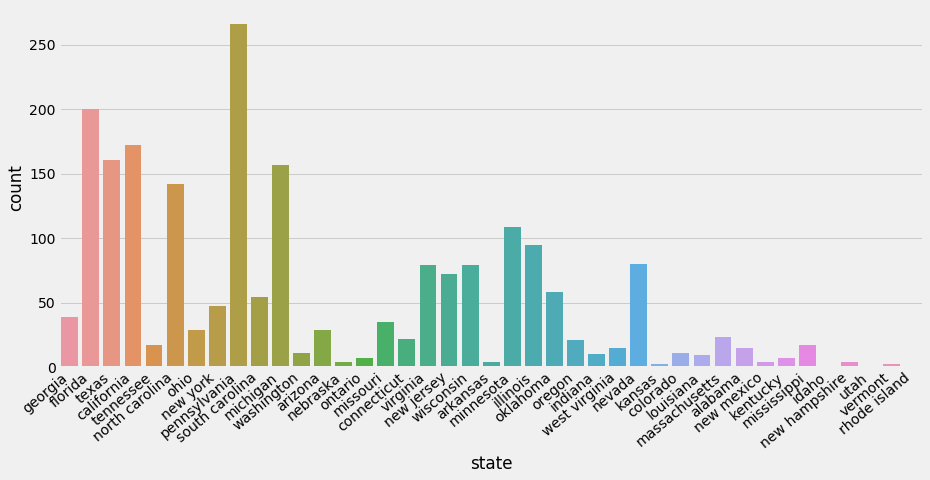

In [112]:
# ------------------------------------------------------
# PLOTTING THE BREAKDOWN BY STATE
# ------------------------------------------------------
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='state', data=df4, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

4.) FIND DISTRIBUTION OF OBSERVATIONS BY COLOR

In [76]:
# ---------------------------------------------------
# LOOKING AT THE BREAKDOWN OF THE CAR DATA BY COLOR
# ---------------------------------------------------
df4['color'].value_counts()


white                                      590
black                                      452
gray                                       345
silver                                     261
red                                        163
blue                                       126
no_color                                    52
charcoal                                    18
green                                       15
gold                                        11
orange                                      11
brown                                        8
magnetic metallic                            6
shadow black                                 5
yellow                                       5
beige                                        4
oxford white                                 4
ingot silver metallic                        4
triple yellow tri-coat                       3
super black                                  3
white platinum tri-coat metallic             2
off-white    

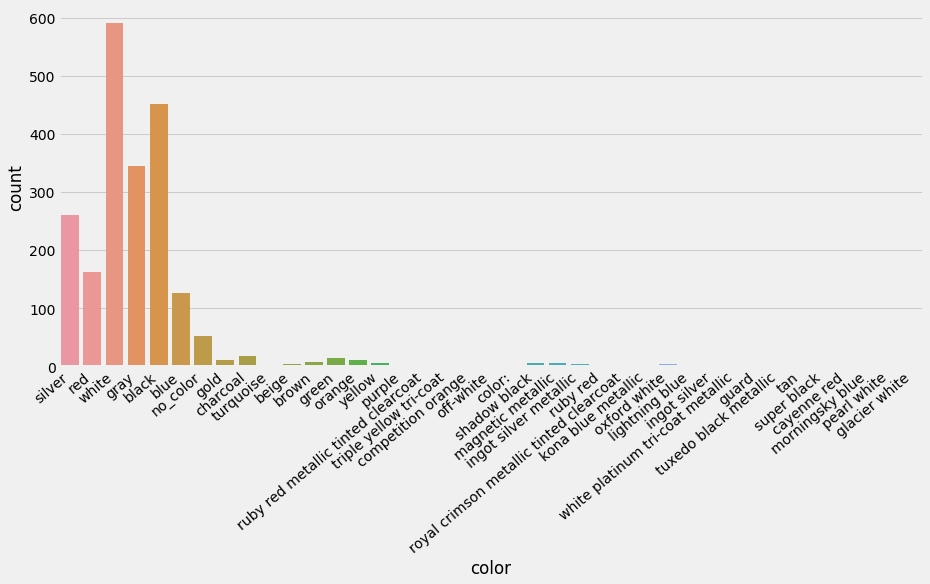

In [113]:
# ------------------------------------------------------
# PLOTTING THE BREAKDOWN BY COLOR
# ------------------------------------------------------
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='color', data=df4, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

5.) FIND DISTRIBUTION OF PRICE BY BRAND

In [78]:
# ---------------------------------
# FINDING AVERAGE PRICE BY BRAND
# ---------------------------------
df4.groupby('brand')['price'].mean()


brand
audi               27950.000000
bmw                37209.090909
buick              22209.545455
cadillac           27712.222222
chevrolet          22555.844624
chrysler           18332.307692
dodge              19353.033333
ford               23832.105307
gmc                12909.687500
harley-davidson    54680.000000
heartland           4050.000000
honda               6987.777778
hyundai             5276.153846
infiniti           13098.333333
jaguar              2800.000000
jeep               12148.846154
kia                12873.636364
land               28900.000000
lexus              33220.000000
lincoln            36300.000000
maserati           30300.000000
mazda              16000.000000
mercedes-benz      28704.000000
nissan             12582.673469
ram                11050.000000
Name: price, dtype: float64

Something seems to be skewing the price. The Average price of
maserati probably shouldn't be lower than lincoln.

In [79]:
# -----------------------------------------------------
# CHECKING THE MIN PRICE OF EACH BRAND
# -----------------------------------------------------
df4.groupby('brand')['price'].min()


brand
audi               19500.0
bmw                19700.0
buick              13200.0
cadillac           18402.0
chevrolet           3300.0
chrysler            5430.0
dodge               2700.0
ford                 650.0
gmc                  500.0
harley-davidson    54680.0
heartland           4050.0
honda               3900.0
hyundai             3250.0
infiniti           10050.0
jaguar              2800.0
jeep                4400.0
kia                 3810.0
land               22500.0
lexus              10840.0
lincoln            36300.0
maserati           30300.0
mazda              16000.0
mercedes-benz      10740.0
nissan               375.0
ram                11050.0
Name: price, dtype: float64

In [80]:
# -----------------------------------------------------
# CHECKING THE MAX PRICE OF EACH BRAND
# -----------------------------------------------------
df4.groupby('brand')['price'].max()


brand
audi               36400.0
bmw                61200.0
buick              37500.0
cadillac           47500.0
chevrolet          63200.0
chrysler           29100.0
dodge              67000.0
ford               74000.0
gmc                48500.0
harley-davidson    54680.0
heartland           4050.0
honda              17200.0
hyundai             9800.0
infiniti           18500.0
jaguar              2800.0
jeep               21100.0
kia                21500.0
land               46900.0
lexus              55600.0
lincoln            36300.0
maserati           30300.0
mazda              16000.0
mercedes-benz      84900.0
nissan             36300.0
ram                11050.0
Name: price, dtype: float64

In [81]:
# -----------------------------------------------------
# CHECKING THE MAX PRICE OF EACH BRAND
# -----------------------------------------------------
df4.groupby('brand')['price'].median()


brand
audi               27950.0
bmw                39000.0
buick              21500.0
cadillac           24500.0
chevrolet          21101.5
chrysler           19400.0
dodge              17500.0
ford               23500.0
gmc                12520.0
harley-davidson    54680.0
heartland           4050.0
honda               6160.0
hyundai             4690.0
infiniti           13915.0
jaguar              2800.0
jeep               11100.0
kia                13300.0
land               23100.0
lexus              33220.0
lincoln            36300.0
maserati           30300.0
mazda              16000.0
mercedes-benz      21450.0
nissan             12050.0
ram                11050.0
Name: price, dtype: float64

Ah, the average price is skewed because many of the brands
only have 1 or a few observations. Duh.

In [82]:
# -------------------------------------------
# CHECKING WHICH BRANDS ARE MOST PROMINENT
# -------------------------------------------
df4['brand'].value_counts()


ford               1053
dodge               360
nissan              294
chevrolet           232
gmc                  32
jeep                 26
hyundai              13
chrysler             13
infiniti             12
buick                11
bmw                  11
kia                  11
mercedes-benz        10
honda                 9
cadillac              9
land                  4
lexus                 2
audi                  2
ram                   1
jaguar                1
harley-davidson       1
heartland             1
lincoln               1
mazda                 1
maserati              1
Name: brand, dtype: int64

In [83]:
# -------------------------------------------------
# CREATING A NEW DF, df5, THAT ONLY HAS THE 4 MOST
# PROMINENT BRANDS. EACH FAR MORE PROMINENT THAN
# THE 5TH MOST
# -------------------------------------------------
df5 = df4[
    (df4['brand'] == 'ford') |
    (df4['brand'] == 'dodge') |
    (df4['brand'] == 'nissan') |
    (df4['brand'] == 'chevrolet')
]
df5.head()


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,17781.988426
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,18669.952862
5,5700.0,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,17781.988426
8,14600.0,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,18669.952862
9,5250.0,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left,21666.888259


In [84]:
# -------------------------------------------------------
# GETTING THE AVG PRICE OF THE 4 MOST PROMINENT BRANDS
# -------------------------------------------------------
common_means_price = df5.groupby('brand')['price'].mean()
common_means_price


brand
chevrolet    22555.844624
dodge        19353.033333
ford         23832.105307
nissan       12582.673469
Name: price, dtype: float64

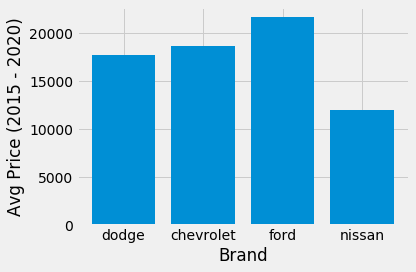

In [85]:
# -------------------------------------------------------
# PLOTTING THE AVG PRICE OF THE 4 MOST PROMINENT BRANDS
# ------------------------------------------------------
plt.bar(df5['brand'], df5['average_price'])
plt.xlabel('Brand')
plt.ylabel('Avg Price (2015 - 2020)')
plt.tight_layout()
plt.show()


6.) FIND DISTRIBUTION OF PRICE BY YEAR

In [86]:
# ------------------------------------------------------
# CHECKING AVERAGE PRICE BY YEAR FOR df5
# ------------------------------------------------------
df5.groupby('year')['price'].mean()

year
2015    15607.681081
2016    17882.224599
2017    18892.633081
2018    19091.878947
2019    24725.085337
2020    24122.044383
Name: price, dtype: float64

In [87]:
# ---------------------------------------------------------------
# CREATING AVERAGE PRICE COLUMN CORRESPONDING WITH PRICE BY YEAR
# ---------------------------------------------------------------
df5['average_year_price'] = df5.groupby('year')['price'].transform('mean')
df5['average_year_price'].head()

2    19091.878947
4    19091.878947
5    19091.878947
8    19091.878947
9    18892.633081
Name: average_year_price, dtype: float64

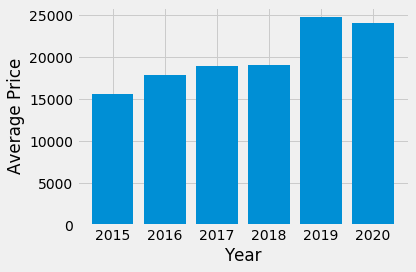

In [88]:
# ------------------------------------------------------
# PLOTTING AVERAGE PRICE BY YEAR FOR df5
# ------------------------------------------------------
plt.bar(df5['year'], df5['average_year_price'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

NOTE: There is only 48 observations for 2020, so that average is not necessarily reliable.

7.) FIND DISTRIBUTION OF PRICE BY STATE

In [89]:
# -----------------------------------------------
# CHECKING AVERAGE PRICE FOR EACH STATE IN df5
# -----------------------------------------------
df5.groupby('state')['price'].mean()

state
alabama           26495.000000
arizona           15075.000000
arkansas          10735.000000
california        19091.985816
colorado          20827.272727
connecticut       15765.312500
florida           16745.819209
georgia           20186.783784
idaho             12500.000000
illinois          29882.446809
indiana           29570.000000
kansas            30700.000000
kentucky          50695.707552
louisiana         17922.777778
massachusetts     19121.521739
michigan          26197.276119
minnesota         19817.129630
mississippi       25070.588235
missouri          18495.714286
nebraska          21350.000000
nevada            24632.500000
new hampshire     16757.500000
new jersey        17217.264706
new mexico        27375.000000
new york          18712.318182
north carolina    16915.310078
ohio              25266.666667
oklahoma          23555.172414
ontario           30357.142857
oregon            14769.047619
pennsylvania      24588.126923
rhode island      11621.000000
so

In [90]:
# -------------------------------------------
# CREATING A NEW AVG PRICE BY STATE COLUMN
# -------------------------------------------
df5['average_state_price'] = df5.groupby('state')['price'].transform('mean')
df5['average_state_price'].head()

2    20186.783784
4    16745.819209
5    15369.170317
8    16745.819209
9    15369.170317
Name: average_state_price, dtype: float64

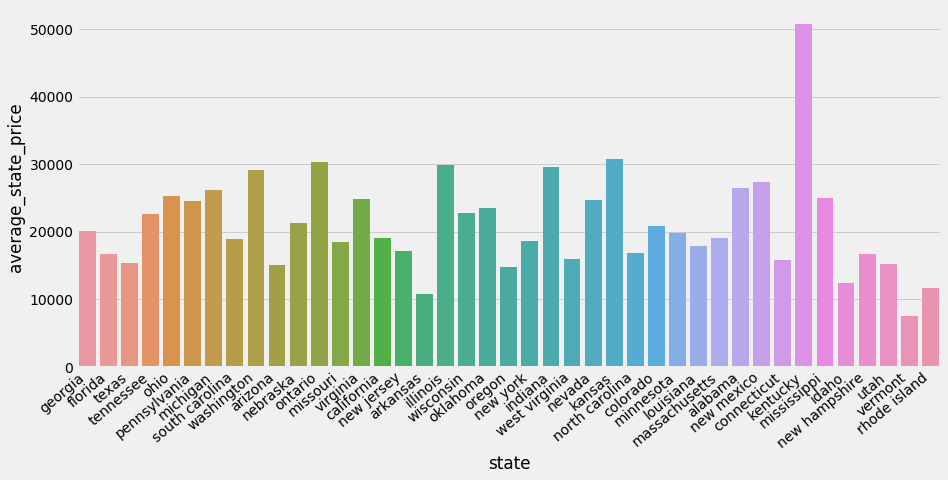

In [126]:
# ------------------------------------------------------
# PLOTTING AVERAGE PRICE BY STATE FOR df5
# ------------------------------------------------------
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df5['state'], y=df5['average_state_price'], ax=ax)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [92]:
# -----------------------------------------------------
# CHECKING TO SEE WHY KENTUCKY'S AVG PRICE IS SO HIGH
# -----------------------------------------------------
df5['state'].value_counts()

pennsylvania      260
florida           177
texas             152
california        141
michigan          134
north carolina    129
minnesota         108
illinois           94
nevada             80
wisconsin          71
new jersey         68
virginia           61
oklahoma           58
south carolina     47
new york           44
georgia            37
missouri           35
arizona            28
massachusetts      23
oregon             21
ohio               18
mississippi        17
connecticut        16
west virginia      15
alabama            15
tennessee          14
colorado           11
washington         10
indiana            10
louisiana           9
kentucky            7
ontario             7
nebraska            4
new hampshire       4
new mexico          4
arkansas            3
kansas              2
vermont             2
utah                1
idaho               1
rhode island        1
Name: state, dtype: int64

Ah, it's because many states only have a few data points. Also, Ontario is not a state in the US. Lets make a 6th DF without it

In [93]:
df6 = df5[df5['state'] != 'ontario']
df6.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,average_price,average_year_price,average_state_price
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,17781.988426,19091.878947,20186.783784
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,18669.952862,19091.878947,16745.819209
5,5700.0,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,17781.988426,19091.878947,15369.170317
8,14600.0,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,18669.952862,19091.878947,16745.819209
9,5250.0,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left,21666.888259,18892.633081,15369.170317


8.) FIND DISTRIBUTION OF PRICE BY COLOR

In [94]:
# ----------------------------------------
# CHECKING AVERAGE PRICE FOR EACH COLOR
# ----------------------------------------
df6.groupby('color')['price'].mean()

color
beige                                      13502.500000
black                                      22353.851827
blue                                       19348.230088
brown                                      22367.166667
cayenne red                                 9794.000000
charcoal                                   16687.500000
color:                                     15099.000000
competition orange                         30977.000000
glacier white                              11621.000000
gold                                       21052.727273
gray                                       19257.925806
green                                      21066.153846
guard                                      14295.000000
ingot silver                               28999.000000
ingot silver metallic                      24216.500000
kona blue metallic                         35999.000000
lightning blue                             21687.000000
magnetic metallic                         

In [95]:
# -------------------------------------------
# CREATING NEW AVG PRICE COLUMN BY COLOR
# -------------------------------------------
df6['average_color_price'] = df6.groupby('color')['price'].transform('mean')
df6['average_color_price'].head()

2    19160.087866
4    21732.615385
5    21870.530266
8    19160.087866
9    22353.851827
Name: average_color_price, dtype: float64

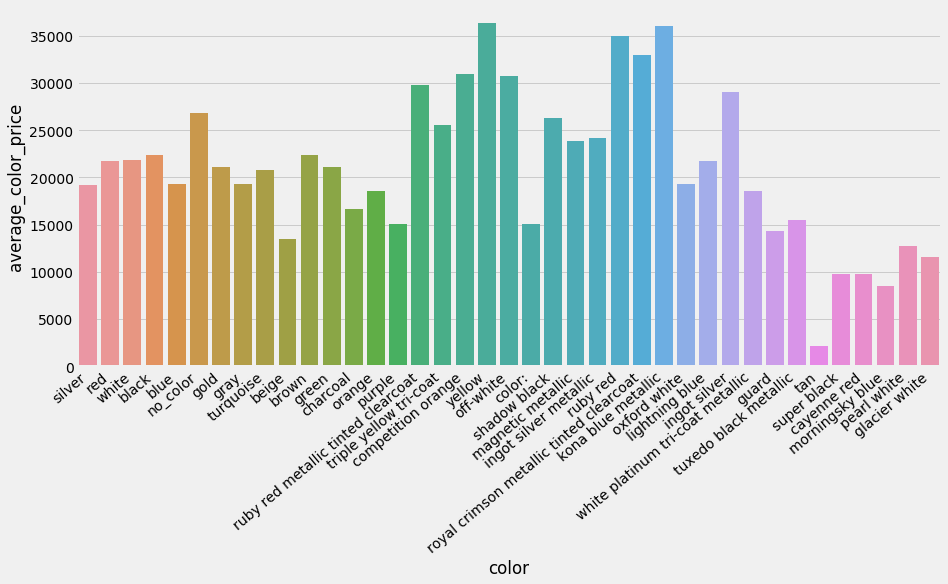

In [127]:
# ------------------------------------------------------
# PLOTTING AVERAGE PRICE BY COLOR FOR df6
# ------------------------------------------------------
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df6['color'], y=df6['average_color_price'], ax=ax)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()